# This is a sample for how to run LSTM to learn a sequence
*adapted from [here](http://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/)*

In [192]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

from scipy import signal, misc

from math import sqrt
import numpy as np
from numpy import concatenate
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline

# Generate or Load data

In [215]:
# fix random seed for reproducibility
np.random.seed(7)

# import raw dataset
# alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
# char_to_int = dict((c, i) for i, c in enumerate(alphabet))
# int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# generate sine
Fs = 32000 # sample rate 
Freq = 2000 # frequency
samples = 512 # samples
t = np.linspace(0, 1/Fs * samples, samples) # generate samples
# sine = .5 * signal.sawtooth( 0.5 * (2 * np.pi) * Freq * t)
sine = .5 * np.sin(2 * np.pi * Freq * t)
sine = sine + .5; # offset

# sine.shape
# saw = np.sin(2 * np.pi * Freq * t)


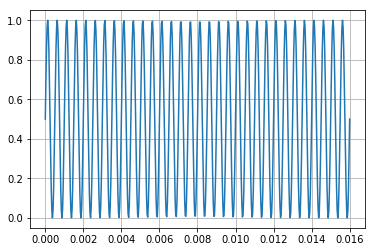

In [216]:
plt.plot(t, sine)
plt.grid()

In [217]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []

# alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# # create mapping of characters to integers (0-25) and the reverse
# char_to_int = dict((c, i) for i, c in enumerate(alphabet))
# int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# for i in range(0, len(alphabet) - seq_length, 1):
# 	seq_in = alphabet[i:i + seq_length]
# 	seq_out = alphabet[i + seq_length]
# 	dataX.append([char_to_int[char] for char in seq_in])
# 	dataY.append(char_to_int[seq_out])
# 	print(seq_in, '->', seq_out)

    
# TODO: normalize data
for i in range(0, len(sine) - seq_length, 1):
    seq_in = [sine[i:i + seq_length]]
    seq_out = sine[i + seq_length]
    dataX.append(seq_in)
    dataY.append(seq_out)
#     print(seq_in, '->', seq_out)

In [218]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), seq_length, 1))
# X = np.reshape(dataX, (X.shape[0], seq_length, 1))

# normalize
# X = X / float(len(alphabet))
# one hot encode the output variable
# y = np_utils.to_categorical(dataY)

y = np.reshape(dataY, (len(dataY), 1))
print(X.shape)
print(y.shape)
dataY

(511, 1, 1)
(511, 1)


[0.69169665636266919,
 0.85409637822444529,
 0.96237967157523763,
 0.99999763768601779,
 0.96120113564783183,
 0.85191942161278555,
 0.68885398260198238,
 0.49692605394996464,
 0.30546791542259449,
 0.14374004892148318,
 0.036459269031483055,
 2.1260691906999085e-05,
 0.0399948322686553,
 0.15027083647417644,
 0.31399582926030073,
 0.50614777591433346,
 0.69736016007569734,
 0.85841005839857865,
 0.96468426994318401,
 0.99994094326654404,
 0.95879181302969718,
 0.84752568674860118,
 0.68314732848997139,
 0.49077862658845178,
 0.29981922403503936,
 0.13945338108283456,
 0.034189754723028931,
 0.00011574901005456661,
 0.042438882596022909,
 0.15469092543421492,
 0.31971643616732082,
 0.51229462236911727,
 0.70299382563456136,
 0.86266955187883976,
 0.9669186144114621,
 0.99980866462109153,
 0.95631312737070617,
 0.84307941075852089,
 0.67741298500934666,
 0.48463259337234915,
 0.29420079724015341,
 0.13522122295675726,
 0.031990664546298009,
 0.00028581298308472114,
 0.044952109899917436

In [219]:
# create and fit the model
model = Sequential()
model.add(LSTM(2, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='mean_squared_error', optimizer='adam')



# model.fit(X, y, epochs=10, batch_size=1, verbose=2)
model.fit(X, y, epochs=1000, batch_size=len(dataX), verbose=0, shuffle=False)

# summarize performance of the model
# TODO: this doesnt work for regression
# scores = model.evaluate(X, y, verbose=0)
# print("Model Accuracy: %.2f%%" % (scores[1]*100))

# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
trainScore = np.sqrt(mean_squared_error(model.predict(X), y))
print('Train Score (less is better): %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score (less is better): 0.14 RMSE


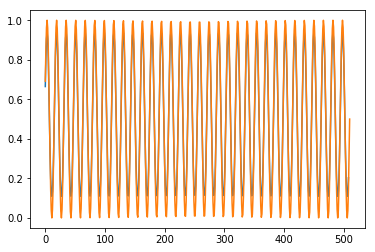

In [240]:
# print(model.predict(X))
# plt.plot(model.predict(X[1:30,:]))
plt.plot(model.predict(X)[1:-1])
plt.plot(y)



first values [ 0.85409638  0.96237967  0.99999764  0.96120114]
(120, 1, 1)


(0, 400)

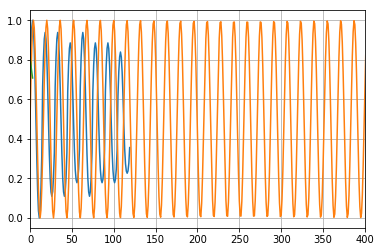

In [245]:
# Generate
generated_signal = []
initial_predict = model.predict(X[2:3,:])
samp = initial_predict;
preds = X[1:16]
# initial_predict = np.reshape(initial_predict, (1, 1, 1));

print("first values", X[2:6,].flatten())
for i in range(1,5):
    generated_signal.append(initial_predict[0,0])
    initial_predict = model.predict(np.reshape(initial_predict, (1,1,1)))
    

# for i in range(1,5):
#     pred = model.predict(X[i+1:i+2,:])
#     preds.append(pred[0,0])
for i in range(1,4):
    pred = model.predict(preds)
    preds = np.concatenate((preds, pred.reshape(len(pred),1,1)))
    
#     preds.concatenate(pred)

# pred = model.predict(X[1:20])
    
# generated_signal
# preds = np.array(generated_signal)
# preds = np.reshape(preds, (len(preds), 1, 1))
# print("pure predictions", preds)
# print("gen predictions", generated_signal)
print(preds.shape)
plt.plot(preds.reshape(len(preds),1))
# plt.plot(X[1:32*2].reshape((32*2)-2,1))
plt.plot(sine)
plt.plot(generated_signal)

plt.grid()
plt.xlim(0,400)

                                     

# Playback generated sound

In [211]:
import sounddevice as sd
import threading

# sinef = sine - 0.5;
# plt.plot(sinef)
# sinef = np.array(sinef, dtype=np.float32)
def callback(outdata, frames, time, status):
#     assert frames == args.blocksize
    if status.output_underflow:
        print('Output underflow: increase blocksize?')
        raise sd.CallbackAbort
    assert not status
    outdata = sinef;
#     print(len(outdata))
#     print('so')
#     try:
#         data = q.get_nowait()
#     except queue.Empty:
#         print('Buffer is empty: increase buffersize?')
#         raise sd.CallbackAbort
#     if len(data) < len(outdata):
#         outdata[:len(data)] = data
#         outdata[len(data):] = b'\x00' * (len(outdata) - len(data))
#         raise sd.CallbackStop
#     else:
#         outdata[:] = data
        
event = threading.Event()
stream = sd.OutputStream(blocksize=1024, channels=1, callback=callback, samplerate=Fs, finished_callback=event.set)
with stream:
    event.wait(3)  # Wait until playback is finished
#     sd.CallbackStop
#     event.set()
#     event.clear()

In [248]:
# sd.CallbackStop
# event.set()
sd.play(np.tile(preds.reshape(len(preds)), 128), Fs)

In [247]:
sd.play(np.tile(sine,128),Fs)

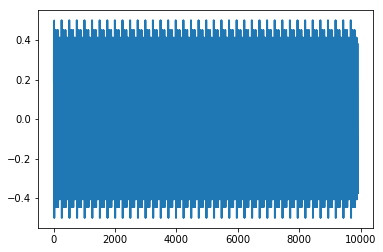

In [222]:
# sine = sine + 0.5
plt.plot(np.tile(preds.reshape(len(preds),), 40))